**1. Importing the libraries** & **Load the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/train 2.csv')

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


**2. Data cleaning and Processing**

In [6]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# data['month'] = data['date'].dt.month
# extracting year from column of dates in the format 2010-01-31.
# year = df["date"].values
# year = [my_str.split("-")[0] for my_str in year]
# df["year"] = year

In [8]:
df1 = df
df1.head(100)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
95,2013-04-06,1,1,23
96,2013-04-07,1,1,17
97,2013-04-08,1,1,19
98,2013-04-09,1,1,13


In [9]:
df1.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [10]:
# 15-01-2013
month = df1['date'].values
month = [my_str.split('-')[1] for my_str in month]
df1['month'] = month

In [11]:
df1.head()

,date,store,item,sales,month
0,2013-01-01,1,1,13,01
1,2013-01-02,1,1,11,01
2,2013-01-03,1,1,14,01
3,2013-01-04,1,1,13,01
4,2013-01-05,1,1,10,01


In [12]:
df1.columns

Index(['date', 'store', 'item', 'sales', 'month'], dtype='object')

In [13]:
df1.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
df1.store.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

In [15]:
df1.shape

(913000, 5)

In [16]:
basket = (df1[df1['month']=='01'].groupby(['store','item'])['sales']).sum()
basket.head(70)

store  item
1      1        2125
       2        5591
       3        3503
       4        2101
       5        1793
               ...  
2      16       3542
       17       4544
       18      11313
       19       5559
       20       6402
Name: sales, Length: 70, dtype: int64

In [17]:
basket = df1.groupby(['month','store','item'])['sales'].sum()
basket.head(10)

month  store  item
01     1      1       2125
              2       5591
              3       3503
              4       2101
              5       1793
              6       5571
              7       5481
              8       7348
              9       4860
              10      7156
Name: sales, dtype: int64

In [18]:
basket1 = basket.unstack()
basket1.head()

item           1     2     3     4     5   ...    46    47    48    49    50
month store                                ...                              
01    1      2125  5591  3503  2101  1793  ...  5677  2071  4936  2803  6257
      2      2956  7865  5011  2924  2544  ...  7821  2969  6973  4020  8869
      3      2637  6963  4456  2642  2228  ...  6978  2631  6077  3502  7923
      4      2411  6463  4118  2440  2102  ...  6619  2460  5673  3280  7317
      5      1763  4753  2910  1692  1450  ...  4709  1778  4110  2322  5335

[5 rows x 50 columns]

In [ ]:
basket1.info()

In [20]:
basket1.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
           dtype='int64', name='item')

**Pivot Table**

In [21]:
df1_table_StoreItemDate = pd.pivot_table(df1,index=['store'],columns=['item','date'],values='sales',fill_value=0)
df1_table_StoreItemDate.head()

item          1                         ...         50                      
date  2013-01-01 2013-01-02 2013-01-03  ... 2017-12-29 2017-12-30 2017-12-31
store                                   ...                                 
1             13         11         14  ...         59         66         45
2             12         16         16  ...         67         79         73
3             19          8         10  ...         68         62         77
4             10         12          8  ...         56         66         81
5             11          9         12  ...         37         60         36

[5 rows x 91300 columns]

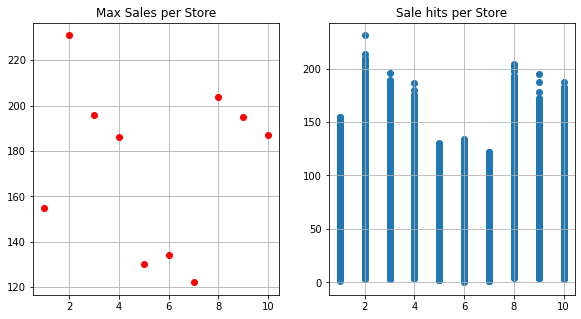

In [22]:
# Sales variation for Store
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
store_sales = pd.pivot_table(df1,index=['store'],values='sales',aggfunc=[np.max])
plt.grid()
plt.title('Max Sales per Store')
plt.plot(store_sales,'ro')
# Sales hit per Store
plt.subplot(1,3,2)
plt.grid()
plt.title('Sale hits per Store')
plt.scatter(df1.store,df1.sales)


           sum       mean
         sales      sales
store                    
1      4315603  47.268379
2      6120128  67.033165
3      5435144  59.530602
4      5012639  54.902946
5      3631016  39.770164
6      3627670  39.733516
7      3320009  36.363735
8      5856169  64.142048
9      5025976  55.049025
10     5360158  58.709288

sum   sales    6.120128e+06
mean  sales    6.703317e+01
dtype: float64


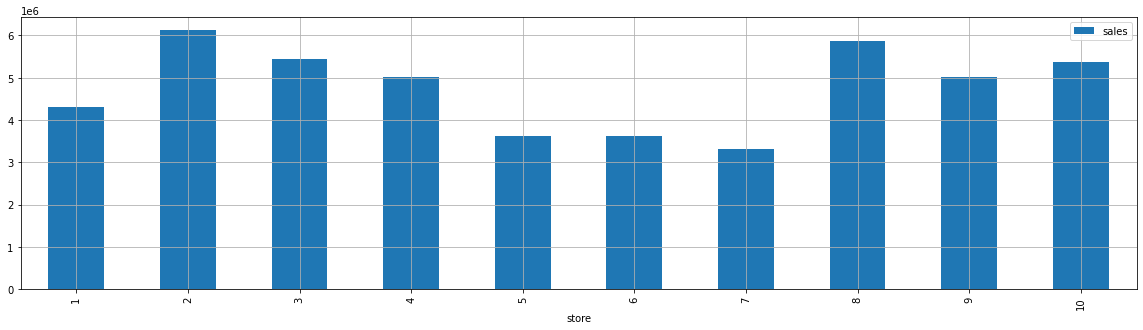

In [23]:
# Store wise total and average sales
df1_StoreSales = pd.pivot_table(df1,index=['store'],values=['sales'],aggfunc=[np.sum,np.mean])
print(df1_StoreSales)
print()
print(df1_StoreSales.max(axis=0))
#print()
df1_StoreSales["sum"].plot(kind="bar",legend="sum", figsize=(20,5)).grid()                                 

          sum       mean
        sales      sales
item                    
1      401384  21.981599
2     1069564  58.574151
3      669087  36.642223
4      401907  22.010241
5      335230  18.358708
6     1068281  58.503888
7     1068777  58.531051
8     1405108  76.950055
9      938379  51.389869
10    1337133  73.227437
11    1271925  69.656353
12    1271534  69.634940
13    1539621  84.316594
14    1071531  58.681873
15    1607442  88.030778
16     468480  25.656079
17     602486  32.994852
18    1538876  84.275794
19     736892  40.355531
20     867641  47.515936
21     736190  40.317087
22    1469971  80.502245
23     534979  29.297864
24    1205975  66.044633
25    1473334  80.686418
26     869981  47.644085
27     402628  22.049726
28    1604713  87.881325
29    1271240  69.618839
30     736554  40.337021
31    1070845  58.644304
32     803107  43.981763
33    1270183  69.560953
34     469935  25.735761
35    1201541  65.801807
36    1406548  77.028916
37     534258  29.258379


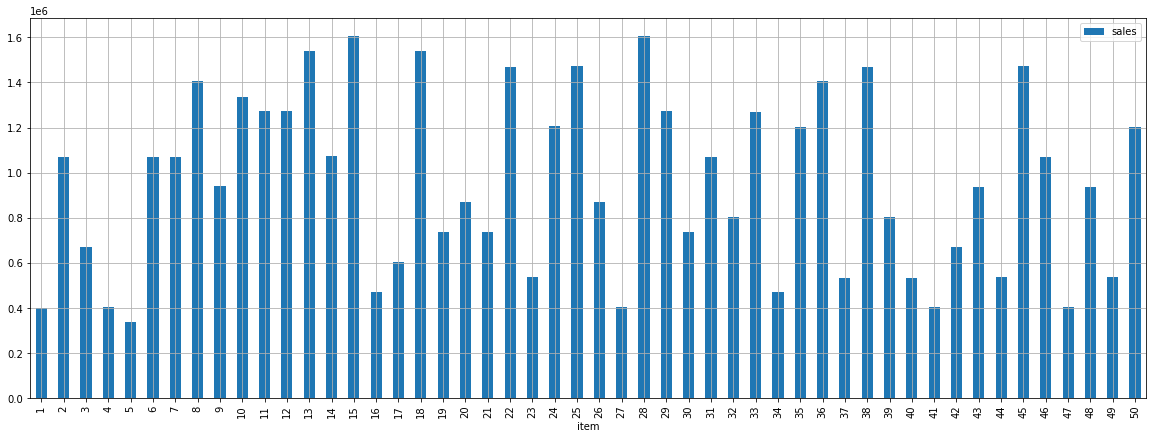

In [24]:
# Item wise total and average sales
df1_ItemSales = pd.pivot_table(df1,index=['item'],columns=None,values=['sales'],aggfunc=[np.sum,np.mean])
print(df1_ItemSales)
print()
print(df1_ItemSales.max(axis=0))
#print()
df1_ItemSales["sum"].plot(kind="bar",legend="sum", figsize=(20,7)).grid()     

In [25]:
# Store wise total and average sales
df1_DateStoreItemSales = pd.pivot_table(df1,index=['month'],columns=['store','item'],values=['sales'],aggfunc=[np.sum,np.mean])
print(df1_DateStoreItemSales)
print()
print(df1_DateStoreItemSales.max(axis=0))
#print()
#df1_DateStoreItemSales["sum"].plot(kind="bar",legend="sum", figsize=(30,10)).grid()     

        sum                     ...       mean                                 
      sales                     ...      sales                                 
store    1                      ...         10                                 
item     1      2     3     4   ...         47         48         49         50
month                           ...                                            
01     2125   5591  3503  2101  ...  16.600000  39.129032  22.025806  49.677419
02     2063   5631  3509  2117  ...  18.723404  42.992908  24.028369  55.553191
03     2728   7461  4606  2759  ...  22.251613  52.722581  30.012903  67.780645
04     3118   8403  5204  3241  ...  26.313333  60.420000  35.693333  78.580000
05     3448   9442  6081  3530  ...  28.270968  65.116129  36.935484  83.922581
06     3725   9596  5972  3602  ...  29.760000  69.240000  40.546667  89.140000
07     4025  10506  6578  3973  ...  31.606452  74.122581  43.329032  93.245161
08     3492   9434  5765  3495  ...  27.

**3. Split the Train and Test data**

In [26]:
X = df1[['store','item','month']]
X

,store,item,month
0,1,1,01
1,1,1,01
2,1,1,01
3,1,1,01
4,1,1,01
...,...,...,...
912995,10,50,12
912996,10,50,12
912997,10,50,12
912998,10,50,12


In [27]:
y = df1['sales']
y

0         13
1         11
2         14
3         13
4         10
          ..
912995    63
912996    59
912997    74
912998    62
912999    82
Name: sales, Length: 913000, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**4. Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler as ss
ss_obj = ss()
X_train = ss_obj.fit_transform(X_train)
X_test = ss_obj.fit_transform(X_test)

**5. Model selection**

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)*100)

1.1715078845463633


In [32]:
print(r2_score(y_train,model.predict(X_train)))   

0.010462316692182339


In [ ]:
#from sklearn.metrics import confusion_matrix
#cm_test = confusion_matrix(y_test,y_pred)
#cm_train = confusion_matrix(y_train,model.predict(X_train))
#print(cm_test)
#print(cm_train)

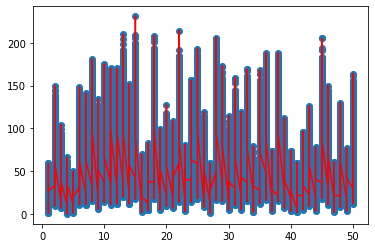

In [33]:
plt.figure()
#plt.scatter(X_train,y_train)
plt.scatter(df1['item'],df1['sales'])
plt.plot(df1['item'],df1['sales'],color='r')

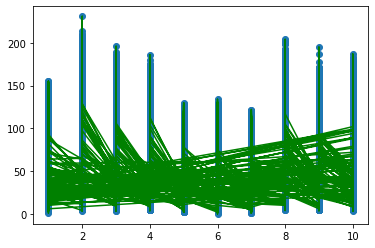

In [34]:
plt.figure()
#plt.scatter(X_train,y_train)
plt.scatter(df1['store'],df1['sales'])
plt.plot(df1['store'],df1['sales'],color='g')

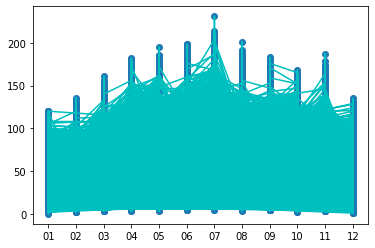

In [35]:
plt.figure()
#plt.scatter(X_train,y_train)
plt.scatter(df1['month'],df1['sales'])
plt.plot(df1['month'],df1['sales'],color='c')